In [1]:
import piff
import proplot as pplt
import numpy as np

In [2]:
piff.__version__

'1.1.0'

In [3]:
models = {}
for fname, band in zip([
    "D00226655_z_c10_r5702p01_piff-model.fits",
    "D00229281_g_c05_r5702p01_piff-model.fits",
    "D00229330_r_c08_r5702p01_piff-model.fits",
    "D00229331_i_c04_r5702p01_piff-model.fits",
], ["z", "g", "r", "i"]):
    models[band] = piff.read(fname)

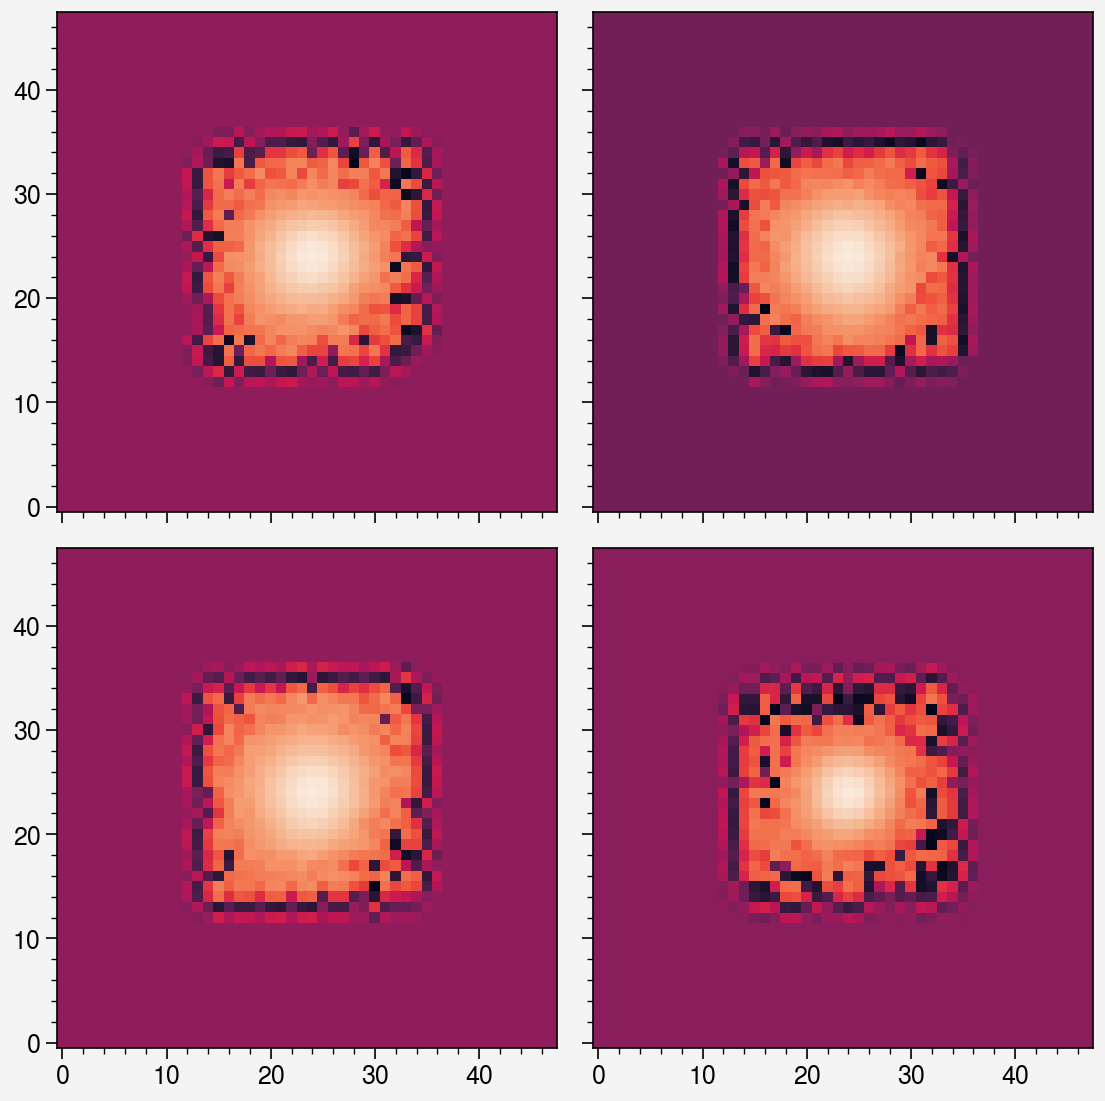

In [4]:
fig, axs = pplt.subplots(nrows=2, ncols=2)

ax = axs[0, 0]
img = models["g"].draw(x=10, y=11, chipnum=5, GI_COLOR=0.61).array
ax.imshow(np.arcsinh(img/np.std(img[:, 12])), origin='lower', cmap='rocket')
ax.grid(False)

ax = axs[0, 1]
img = models["r"].draw(x=10, y=11, chipnum=8, GI_COLOR=0.61).array
ax.imshow(np.arcsinh(img/np.std(img[:, 12])), origin='lower', cmap='rocket')
ax.grid(False)

ax = axs[1, 0]
img = models["i"].draw(x=10, y=11, chipnum=4, GI_COLOR=0.61).array
ax.imshow(np.arcsinh(img/np.std(img[:, 12])), origin='lower', cmap='rocket')
ax.grid(False)


ax = axs[1, 1]
img = models["z"].draw(x=10, y=11, chipnum=10, IZ_COLOR=0.24).array
ax.imshow(np.arcsinh(img/np.std(img[:, 12])), origin='lower', cmap='rocket')
ax.grid(False)


In [66]:
import galsim

y, x = np.mgrid[:25, :25]

msk = (
    (y < 4)
    | (y > 20)
    | (x < 4)
    | (x > 20)
)

pixels = []
for i in range(100):
    x = np.random.uniform() * 2048 + 1
    y = np.random.uniform() * 4096 + 1
    img = galsim.ImageD(25, 25, scale=0.263)
    models["z"].draw(x=x, y=y, chipnum=10, IZ_COLOR=0.61, image=img, center=(13, 13))
    img = img.array
    img = img/img.sum()
    pixels.append(img[msk])
    

In [67]:
nse = np.std(np.hstack(pixels))
print(nse, np.mean(np.hstack(pixels))/nse)

0.00010408070910149014 0.24794758582218393


In [68]:
np.sqrt(np.sum(img**2))/nse

1491.0160202781708

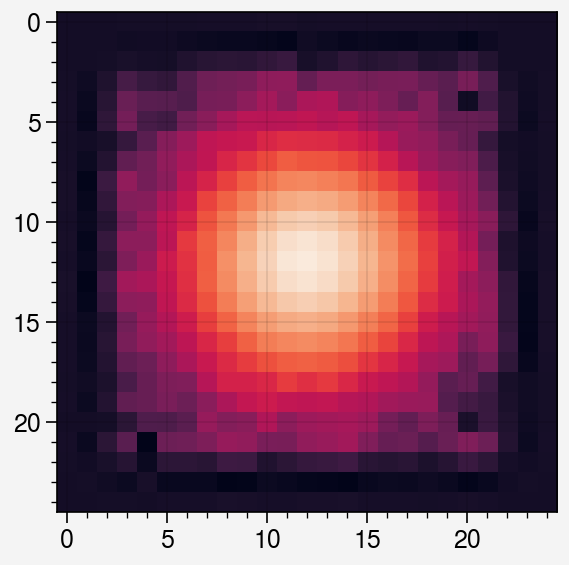

In [49]:
fig, axs = pplt.subplots()
axs.imshow(np.arcsinh(img/nse), cmap="rocket")

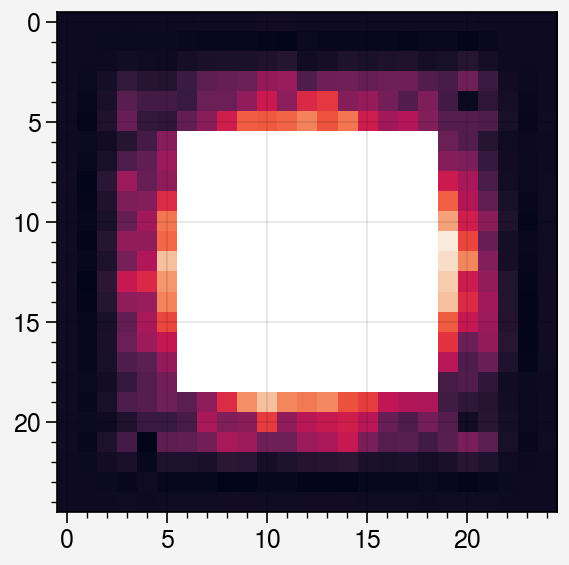

In [38]:
tst = img.copy()
dim = (13-1)//2
cen = (25-1)//2
tst[cen-dim:cen+dim+1, cen-dim:cen+dim+1] = np.nan
fig, axs = pplt.subplots()
axs.imshow(tst, cmap="rocket")

In [39]:
np.sqrt(np.sum(np.isnan(tst)))

13.0

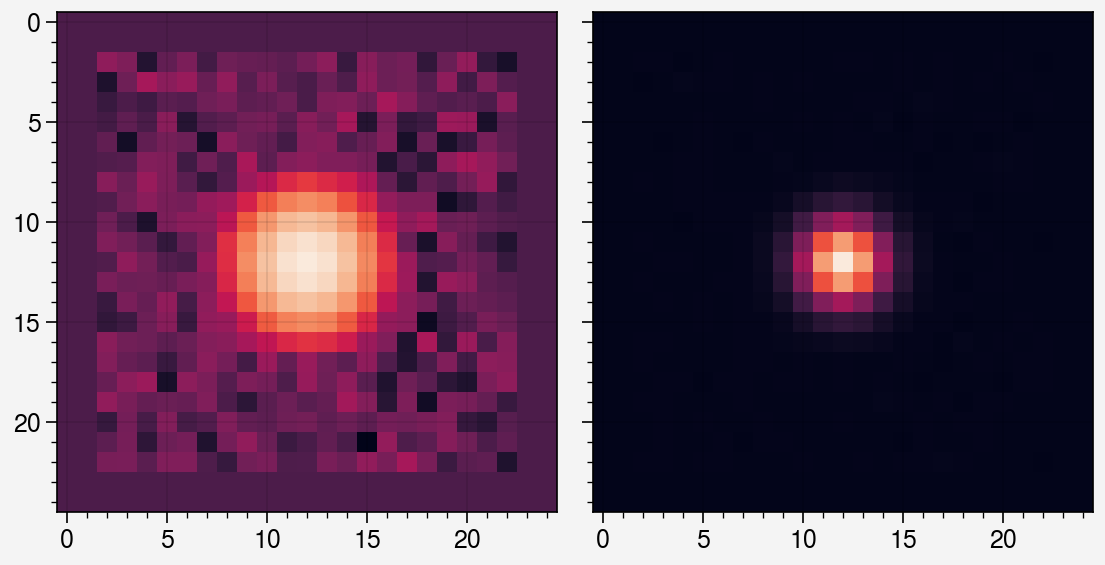

In [54]:
import galsim
rng = np.random.RandomState(seed=10)

psf = galsim.Gaussian(fwhm=0.9)
scale = 0.263
psf_dim = 25
psf_cen = (psf_dim-1)//2
psf_im = psf.drawImage(nx=psf_dim, ny=psf_dim, scale=scale).array
psf_im /= np.sum(psf_im)
psf_nse_dim = (21-1)//2
psf_nse = 1.6e-4
psf_mn = 0.5 * psf_nse
psf_im[psf_cen-psf_nse_dim:psf_cen+psf_nse_dim+1, psf_cen-psf_nse_dim:psf_cen+psf_nse_dim+1] += psf_mn
psf_im[
    psf_cen-psf_nse_dim:psf_cen+psf_nse_dim+1, 
    psf_cen-psf_nse_dim:psf_cen+psf_nse_dim+1
] += (rng.normal(size=(21, 21)) * psf_nse)


fig, axs = pplt.subplots(nrows=1, ncols=2)
axs[0].imshow(np.arcsinh(psf_im/psf_nse), cmap="rocket")
axs[1].imshow(psf_im, cmap="rocket")